In [1]:
#Loading the IMDB dataset

In [2]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [3]:
train_data[0]
train_labels[0]
max([max(sequence) for sequence in train_data])

9999

In [4]:
#Decoding reviews back to text

In [5]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [6]:
#Encoding the integer sequences via multi-hot encoding

In [7]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [9]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [10]:
#Building your model

In [11]:
#Model definition

In [12]:
#original model from textbook
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [14]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [15]:
#Setting aside a validation set

In [16]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [17]:
#Training your model

In [18]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 28ms/step - loss: 0.5240 - accuracy: 0.7886 - val_loss: 0.4108 - val_accuracy: 0.8526
Epoch 2/20
30/30 [==============================] - 0s 14ms/step - loss: 0.3224 - accuracy: 0.8939 - val_loss: 0.3151 - val_accuracy: 0.8827
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2440 - accuracy: 0.9179 - val_loss: 0.2846 - val_accuracy: 0.8889
Epoch 4/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1949 - accuracy: 0.9353 - val_loss: 0.2753 - val_accuracy: 0.8888
Epoch 5/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1602 - accuracy: 0.9485 - val_loss: 0.2866 - val_accuracy: 0.8849
Epoch 6/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1367 - accuracy: 0.9564 - val_loss: 0.3215 - val_accuracy: 0.8737
Epoch 7/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1169 - accuracy: 0.9625 - val_loss: 0.3245 - val_accuracy: 0.8789
Epoch 8/20
30

In [19]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [20]:
#Plotting the training and validation loss

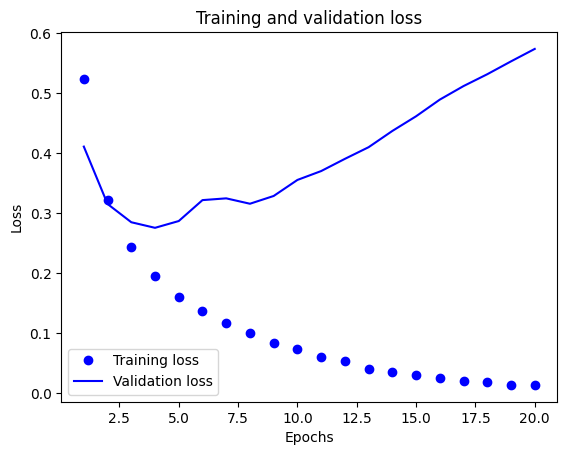

In [21]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [21]:
#Plotting the training and validation accuracy

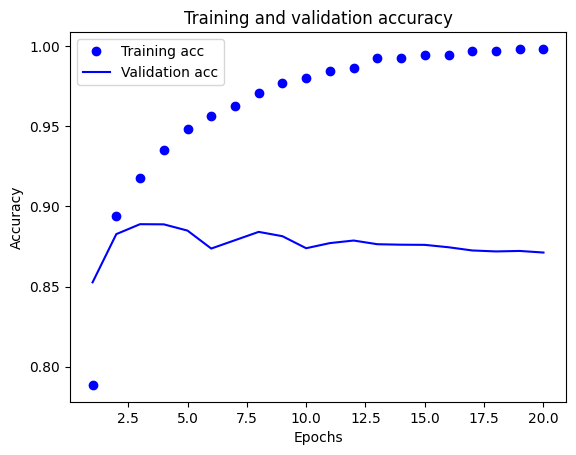

In [22]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [23]:
#######retrian model######

In [23]:
# the first one:
#four layers 
                #16,16,16,1 nodes
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [24]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [25]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 51ms/step - loss: 0.5606 - accuracy: 0.7525 - val_loss: 0.4259 - val_accuracy: 0.8558
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3394 - accuracy: 0.8942 - val_loss: 0.3748 - val_accuracy: 0.8454
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2460 - accuracy: 0.9226 - val_loss: 0.2859 - val_accuracy: 0.8892
Epoch 4/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1907 - accuracy: 0.9370 - val_loss: 0.2782 - val_accuracy: 0.8855
Epoch 5/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1578 - accuracy: 0.9478 - val_loss: 0.2874 - val_accuracy: 0.8831
Epoch 6/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1285 - accuracy: 0.9573 - val_loss: 0.3627 - val_accuracy: 0.8636
Epoch 7/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1129 - accuracy: 0.9640 - val_loss: 0.3181 - val_accuracy: 0.8824
Epoch 8/20
30/3

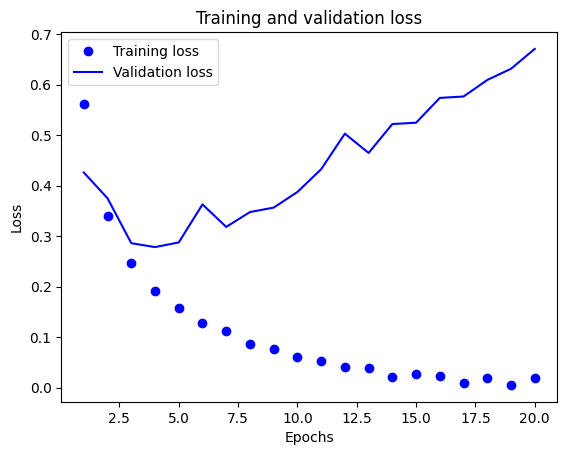

In [26]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

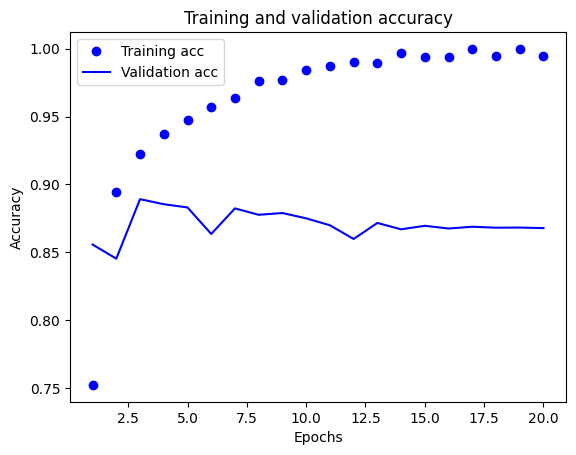

In [27]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [28]:
# the second one:
#three layers
                # 64,64,1 nodes
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [29]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [30]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 21ms/step - loss: 0.5141 - accuracy: 0.7501 - val_loss: 0.3797 - val_accuracy: 0.8462
Epoch 2/20
30/30 [==============================] - 0s 15ms/step - loss: 0.3017 - accuracy: 0.8879 - val_loss: 0.3000 - val_accuracy: 0.8831
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2310 - accuracy: 0.9115 - val_loss: 0.2760 - val_accuracy: 0.8891
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1783 - accuracy: 0.9369 - val_loss: 0.4063 - val_accuracy: 0.8433
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1525 - accuracy: 0.9439 - val_loss: 0.2916 - val_accuracy: 0.8833
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1214 - accuracy: 0.9569 - val_loss: 0.3743 - val_accuracy: 0.8629
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1061 - accuracy: 0.9607 - val_loss: 0.3623 - val_accuracy: 0.8721
Epoch 8/20
30

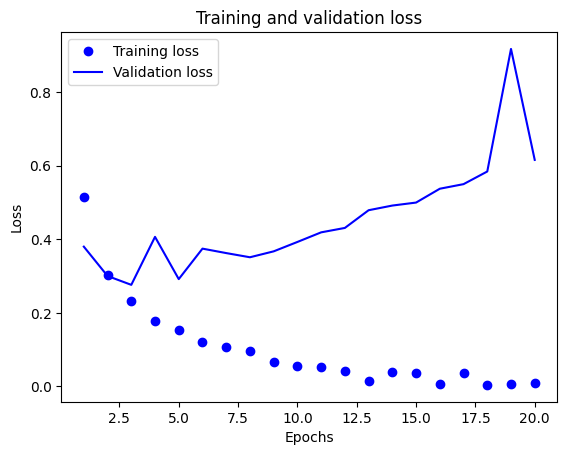

In [31]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

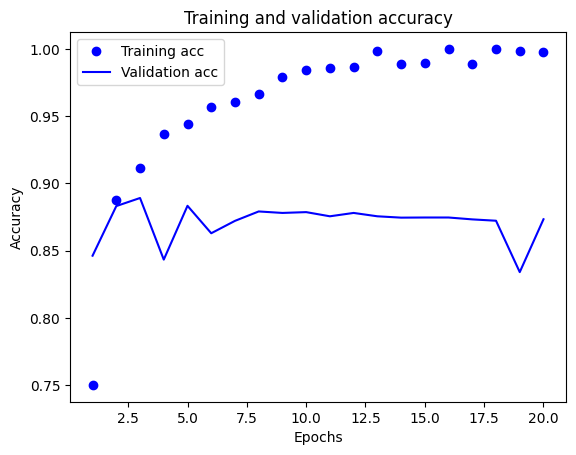

In [32]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [33]:
# the third one:
#three layers
            #16,16,1 nodes
                        #mse loss function is deployed instead of binary_crossentropy
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

In [34]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [35]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1907 - accuracy: 0.7754 - val_loss: 0.1429 - val_accuracy: 0.8509
Epoch 2/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1164 - accuracy: 0.8787 - val_loss: 0.1074 - val_accuracy: 0.8777
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0876 - accuracy: 0.9045 - val_loss: 0.0939 - val_accuracy: 0.8853
Epoch 4/20
30/30 [==============================] - 0s 11ms/step - loss: 0.0716 - accuracy: 0.9193 - val_loss: 0.0888 - val_accuracy: 0.8841
Epoch 5/20
30/30 [==============================] - 0s 12ms/step - loss: 0.0615 - accuracy: 0.9303 - val_loss: 0.0844 - val_accuracy: 0.8878
Epoch 6/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0538 - accuracy: 0.9405 - val_loss: 0.0883 - val_accuracy: 0.8816
Epoch 7/20
30/30 [==============================] - 0s 12ms/step - loss: 0.0478 - accuracy: 0.9500 - val_loss: 0.0863 - val_accuracy: 0.8807
Epoch 8/20
30

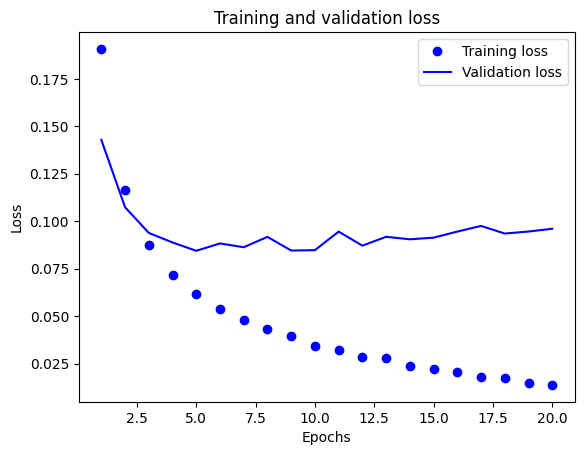

In [36]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

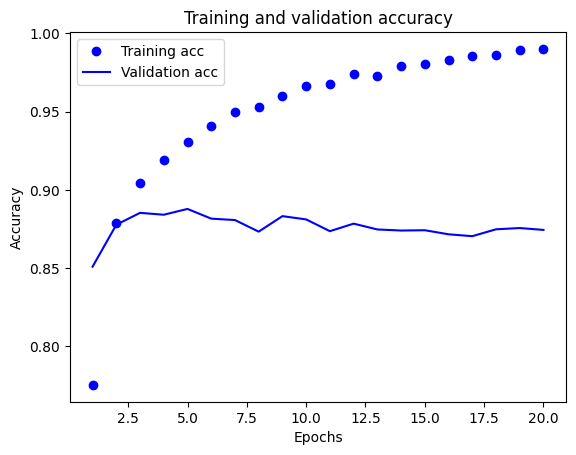

In [37]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [38]:
# the fourth one:
#three layers
                # 64,64,1 nodes
                            #tanh as the replacement of relu
model = keras.Sequential([
    layers.Dense(64, activation="tanh"),
    layers.Dense(64, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [39]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [40]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 21ms/step - loss: 0.4835 - accuracy: 0.7748 - val_loss: 0.3868 - val_accuracy: 0.8289
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2737 - accuracy: 0.8893 - val_loss: 0.2902 - val_accuracy: 0.8819
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2044 - accuracy: 0.9186 - val_loss: 0.2766 - val_accuracy: 0.8877
Epoch 4/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1588 - accuracy: 0.9411 - val_loss: 0.5059 - val_accuracy: 0.8188
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1511 - accuracy: 0.9431 - val_loss: 0.3168 - val_accuracy: 0.8847
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1083 - accuracy: 0.9600 - val_loss: 0.3572 - val_accuracy: 0.8788
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0959 - accuracy: 0.9633 - val_loss: 0.4252 - val_accuracy: 0.8695
Epoch 8/20
30

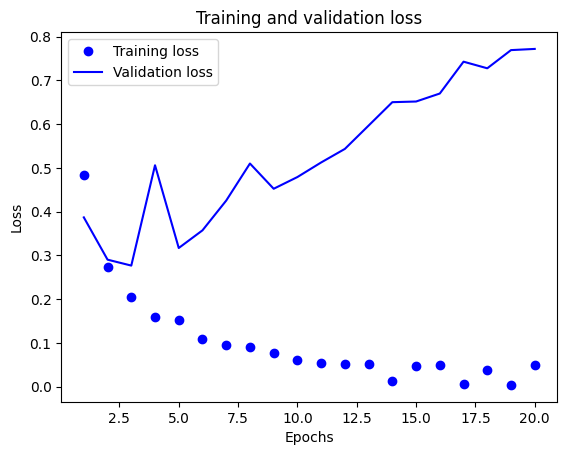

In [41]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

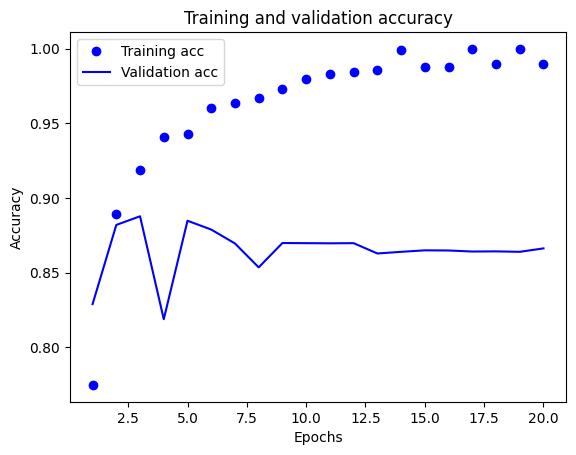

In [42]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [44]:
#model wuth dropout
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 1s 22ms/step - loss: 0.6486 - accuracy: 0.6207 - val_loss: 0.5468 - val_accuracy: 0.8367
Epoch 2/20
30/30 [==============================] - 0s 10ms/step - loss: 0.5330 - accuracy: 0.7527 - val_loss: 0.4238 - val_accuracy: 0.8657
Epoch 3/20
30/30 [==============================] - 0s 10ms/step - loss: 0.4449 - accuracy: 0.8182 - val_loss: 0.3536 - val_accuracy: 0.8810
Epoch 4/20
30/30 [==============================] - 0s 11ms/step - loss: 0.3787 - accuracy: 0.8521 - val_loss: 0.3158 - val_accuracy: 0.8823
Epoch 5/20
30/30 [==============================] - 0s 10ms/step - loss: 0.3244 - accuracy: 0.8773 - val_loss: 0.2850 - val_accuracy: 0.8892
Epoch 6/20
30/30 [==============================] - 0s 11ms/step - loss: 0.2843 - accuracy: 0.8997 - val_loss: 0.2758 - val_accuracy: 0.8903
Epoch 7/20
30/30 [==============================] - 0s 10ms/step - loss: 0.2501 - accuracy: 0.9135 - val_loss: 0.2757 - val_accuracy: 0.8915
Epoch 8/20
30

In [ ]:
#I dont know how to plot so I plot using the above values in excel 
